# Import Package

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

## Problem 1: Bag-of-Words model

### 1.1: Read image

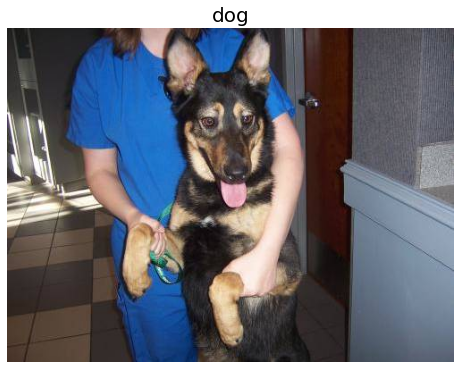

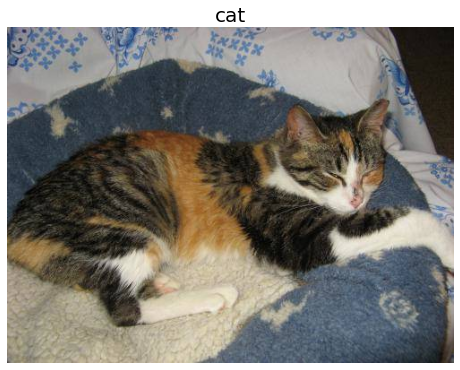

In [2]:
def read_display_image(path, label):
    img = cv2.imread(path)
    if img is None:
            raise FileNotFoundError(f"Image file not found: {path}")
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) ##convert img format from BGR to RGB
    plt.title(label,fontsize = 20)
    plt.axis("off")
    plt.show()
read_display_image('./animals/dogs/dogs_00009.jpg','dog')
read_display_image('./animals/cats/cats_00002.jpg','cat')

### 1.2: Uniform image size

labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

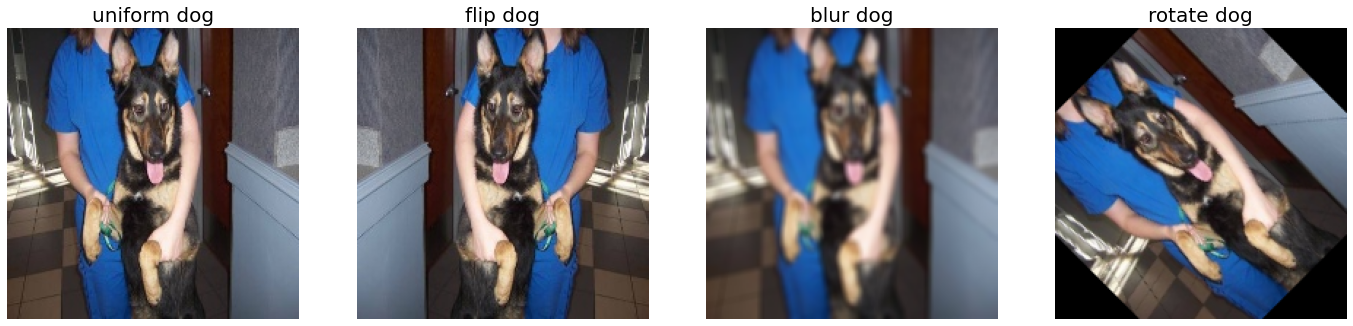

In [3]:
def size_uniform(img,size):
    return cv2.resize(img,size)

labels = ["dogs","cats","panda"]
y_label = []
for label_name in labels:
    subfolder = os.path.join('./animals',label_name)
    out_subfolder = os.path.join('./uniform_animals',label_name)
    for file_name in os.listdir(subfolder):
        current_img_path = os.path.join(subfolder,file_name)
        output_img_path = os.path.join(out_subfolder,file_name)
        img = cv2.imread(current_img_path)
        if img is None:
                print(f"Skipping invalid image file: {file_name}")
        new_img = size_uniform(img,(200,200))
        cv2.imwrite(output_img_path,new_img)    ##store the uniform image for the next step
        if label_name == "dogs":                ##encoding the output labels so that we can train the SVM
             y_label.append(0)
        elif label_name == "cats":
             y_label.append(1)
        elif label_name == "panda":
             y_label.append(2)    
print("labels",y_label)
print("img_amount",len(y_label))
##Image Augmentation

#Uniform
img = cv2.imread('./uniform_animals/dogs/dogs_00009.jpg')
print("new_size",(img.shape))
plt.figure(figsize=(24, 24))
plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) ##convert img format from BGR to RGB
plt.title("uniform dog",fontsize = 20)
plt.axis("off")
#flip
flip_img = cv2.flip(img,1)
plt.subplot(1,4,2)
plt.imshow(cv2.cvtColor(flip_img, cv2.COLOR_BGR2RGB)) ##convert img format from BGR to RGB
plt.title("flip dog",fontsize = 20)
plt.axis("off")
#blur
blur_img = cv2.GaussianBlur(img,(5,5),3)
plt.subplot(1,4,3)
plt.imshow(cv2.cvtColor(blur_img, cv2.COLOR_BGR2RGB)) ##convert img format from BGR to RGB
plt.title("blur dog",fontsize = 20)
plt.axis("off")
#rotation
row, col, _ = img.shape
rotate_matrix = cv2.getRotationMatrix2D((col/2, row/2), 45, 1)
rotate_image = cv2.warpAffine(img,rotate_matrix,(col,row))
plt.subplot(1,4,4)
plt.imshow(cv2.cvtColor(rotate_image, cv2.COLOR_BGR2RGB)) ##convert img format from BGR to RGB
plt.title("rotate dog",fontsize = 20)
plt.axis("off")
plt.show()


### 1.3 Extract features (SIFT)

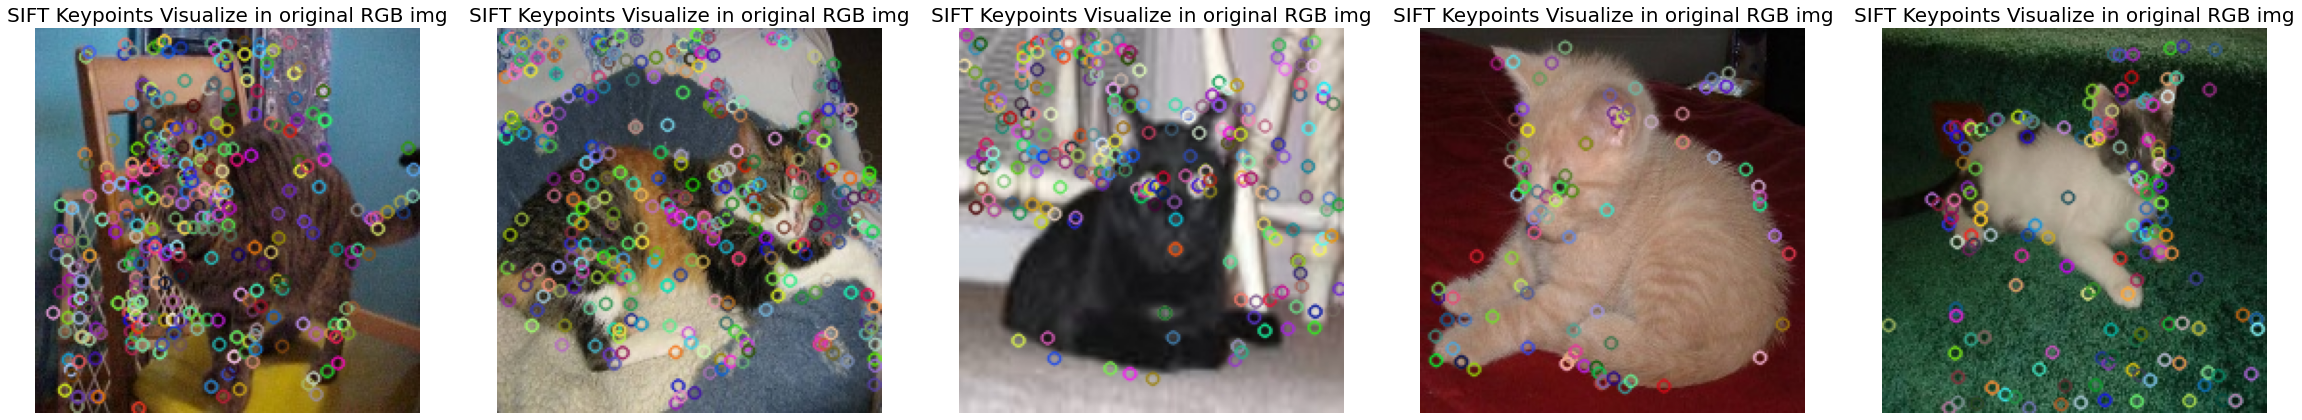

In [4]:
def feature_Extract(img,All_features_total,all_features_arr,i):
     #convert bgr to Gray so that it can decrease many times of computation
     Gray_level = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
     sift = cv2.SIFT_create()
     keypoints , descriptors = sift.detectAndCompute(Gray_level,None)
     ##For save and directly use
     All_features_total.extend(descriptors)
     ##For travel to compute the bovx feature, using Kmeans
     all_features_arr.append(descriptors)
     if i <= 4:
        image_with_keypoints = cv2.drawKeypoints(img, keypoints, None)    ## draw keypoints in the original img
        plt.subplot(1,5, i+1)
        plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB)) ##convert img format from BRG to RGB
        plt.title("SIFT Keypoints Visualize in original RGB img",fontsize = 20)
        plt.axis("off")

plt.figure(figsize=(40, 8))
labels = ["cats","dogs","panda"]
All_features_total = []         ##merge version
all_features_arr = []           ##additional dimension which is about the number of the image
i = 0
for label_name in labels:
    subfolder = os.path.join('./uniform_animals',label_name)
    for file_name in os.listdir(subfolder):
        current_img_path = os.path.join(subfolder,file_name)
        img = cv2.imread(current_img_path)
        if img is None:
                print(f"Skipping invalid image file: {file_name}")
        feature_Extract(img,All_features_total,all_features_arr,i)
        i += 1
plt.show()
np.save('all_features_total.npy', np.array(All_features_total))


### 1.4 K-means to get Codebook + 1.5  Quantize features and represent by frequencies

K Value Too Small: If the chosen K value is too small, it may lead to an insufficient number of cluster centers to capture the diversity of the data, resulting in underfitting. This can cause similar but not identical features to be grouped into the same cluster, reducing the discriminative power of the features.

K Value Too Large: Choosing a K value that is too large can lead to overfitting. Having too many cluster centers may result in noise data being grouped into clusters, reducing the robustness of the features.

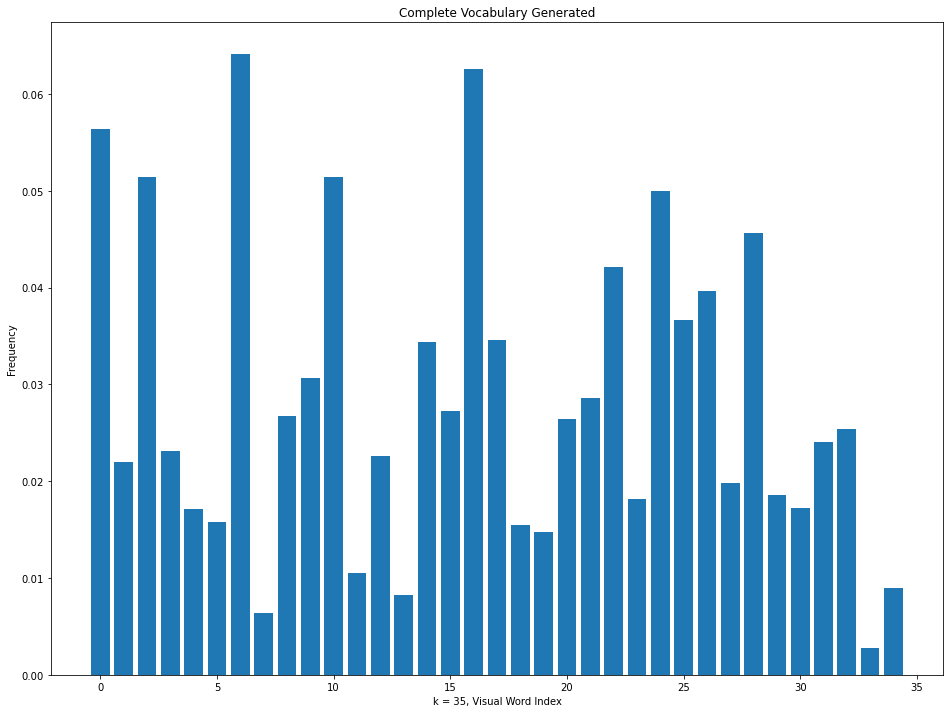

In [9]:
Features = np.load('all_features_total.npy')
# all_features_arr translate to Features
# discriptors = np.array(all_features_arr[0])
# for descriptor in all_features_arr[1:]:
#     discriptors = np.vstack((discriptors,descriptor))
def quantize(k,Features,all_features_arr):
    plt.figure(figsize=(16, 12))
    model = KMeans(n_clusters = k)
    model.fit(Features)
    im_feature = np.array([np.zeros(model.n_clusters) for i in range(len(all_features_arr))])
    for i in range(len(all_features_arr)):
        for j in range(len(all_features_arr[i])):
            f = all_features_arr[i][j]
            f = f.reshape(1,128)
            y_pred = model.predict(f)
            im_feature[i][y_pred] += 1
    return im_feature
def plot_hist(im_feature, k):
    x_scalar = np.arange(k)
    y_scalar = np.array([abs(np.sum(im_feature[:,h], dtype=np.int32)) for h in range(k)])
    plt.bar(x_scalar, y_scalar/np.sum(y_scalar))
    plt.xlabel(f"k = {k}, Visual Word Index")
    plt.ylabel("Frequency")
    plt.title("Complete Vocabulary Generated")
    plt.show()

train_x = quantize(35,Features,all_features_arr)
scale = StandardScaler().fit(train_x)
train_x_scale = scale.transform(train_x)
plot_hist(train_x_scale, 35)

## Problem 2: SVM classification

### 2.1 An SVM classifier with hinge loss

In [10]:
##hyperparameters need to change
svm_model = LinearSVC(C = 5,loss = 'hinge', random_state=42, max_iter = 5000000,dual = 'auto')

### 2.2 Train model

#### 2.2.1 Directly use the dataset

In [11]:
## Data processing
X_train, X_test, y_train, y_test = train_test_split(train_x_scale, y_label, test_size=0.3, random_state=42)
svm_model.fit(X_train,y_train)
y_pred1 = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5566666666666666


#### 2.2.2 PCA dataset

In [12]:
accuracy_list = []
for k in range(2,35):
    pca_model = PCA(n_components=k)
    pca_model.fit(train_x_scale)
    reduced_data = pca_model.transform(train_x_scale)
    X_train, X_test, y_train, y_test = train_test_split(reduced_data, y_label, test_size=0.3, random_state=42)
    svm_model.fit(X_train,y_train)
    y_pred1 = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred1)
    accuracy_list.append(accuracy)
arr = np.array(accuracy_list)
print(f'Accuracy: {np.max(arr)}, n_components = {np.argmax(arr) + 2}')

Accuracy: 0.56, n_components = 31


To train a better classifier, I do some improvements as follows:
1. Change the hyper parameter `C` in `svm_model` and increase the `max_iter` so that the algorithm can converge and perform better.  
2. For PCA, I first normalize the training dataset, and then I also change the hyper parameter `n_components` in `pca_model` so that we can find the best reduced dimension.

### 2.3 Backward passing

The goal of unconstrained problem of SVM is $min_w \frac{1}{2}\|w\|^2 + C\sum_{i=1}^m(1-y_iw^{T}x_i)$:
1. To improve the SVM classifier, all we need to focus is the value of `w`
2. The first part is Regulation part, $R = min_w \frac{1}{2}\|w\|^2$
   - $\frac{\partial{R}}{\partial{w}} = w$
3. The second part is loss function part, $L = C\sum^m_{i=1} (1-y_iw^{T}x_i)$
   - $\frac{\partial{L}}{\partial{w}} = -C\sum_{i=1}^m y_ix_i$
4. Total gradient $\frac{\partial{J}}{\partial{w}} = \frac{\partial{R}}{\partial{w}}+\frac{\partial{L}}{\partial{w}}$
5. Gradient descend $w = w - \alpha\frac{\partial{J}}{\partial{w}}$